## Bike Sharing

Luis Garduno

-------------------------------------
    
Dataset [UCI ML Repositories]: __[Bike Sharing Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip)__

Question Of Interest : Can you forecast the bike rental demand for the Washington DC Bike Sharing program?
    
-------------------------------------

## 1. Data Overview

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1 Data Preparation
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1.1 Data Description

In [1]:
import os
import numpy as np
import pandas as pd

df = pd.read_csv('../data/bikes/hour.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [2]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000



#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1.2 Normalizing the Dataset

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# --- Encode the Categorical, discrete variables ---
# OneHotEncode Season
cat_attribs = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# --- Scale the Numeric, continuous variables ---
num_attribs = ['temp', 'atemp', 'hum', 'windspeed']


#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1.3 Data Quality


Number of unique values in column "instant" :  17379
Duplicates :  0 



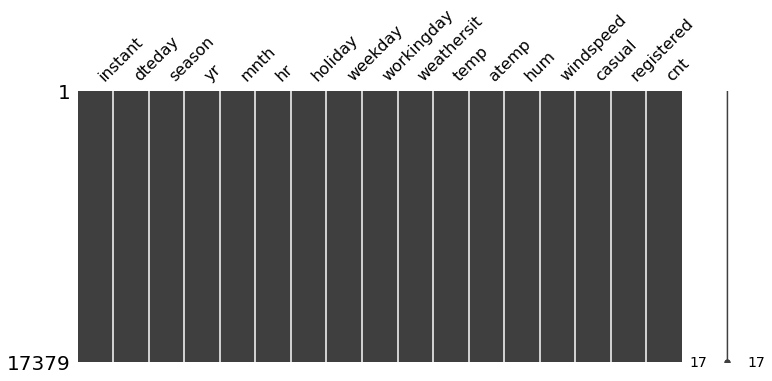

In [4]:
import missingno as mn

mn.matrix(df, figsize=(12, 5))

# Count unique values in column 'instant' (record index) of the dataframe
print('\nNumber of unique values in column "instant" : ', df['instant'].nunique())

dup_df = df.replace(to_replace=-1,value=np.nan)

dup_df = dup_df.duplicated()
print('Duplicates : ', len(df[dup_df]), "\n")

---------------------------------------------

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1.4 Cleaning the Dataset

In [5]:
#df = df.drop(['instant', 'dteday','casual', 'registered'], axis=1)
#df.info()

--------------------------------------


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.2 Creating Training & Test Data

In [6]:
from sklearn.model_selection import train_test_split

# Split training & testing data using scikit-learn's function
#X = df.drop("cnt", axis=1)
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print("Train:", len(train_set), "\nTest :", len(test_set))

Train: 13903 
Test : 3476


-----------------------

## 2. Data Visualization

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Correlation Matrix 

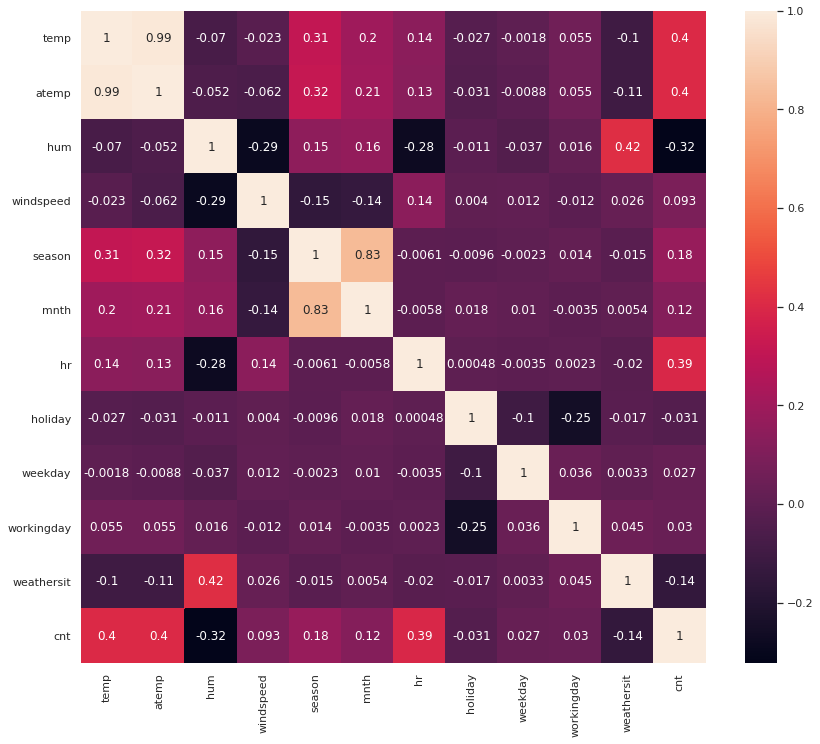

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cmap = sns.set(style="darkgrid", palette="colorblind")
attribs = num_attribs + cat_attribs + ['cnt']

plt.subplots(figsize=(14,12))
plt.pcolor(df[attribs].corr())
plt.xticks(np.arange(0, len(attribs), 1), attribs, rotation=90)
plt.yticks(np.arange(0, len(attribs), 1), attribs, rotation=90)
sns.heatmap(df[attribs].corr(), annot=True)
plt.show()

It is observed that variables <code>atemp</code> & <code>temp</code> are heavily correlated. 

The <code>atemp</code> variable is dropped since it only represents what the outside temperature _feels_ like.

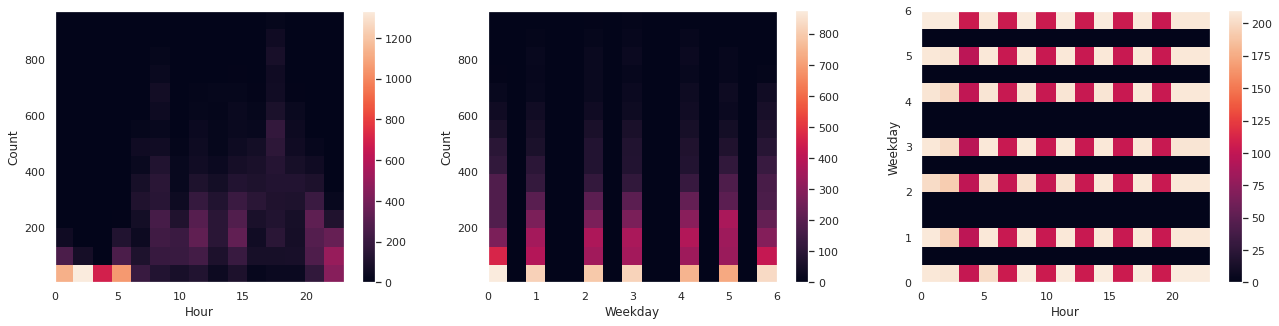

In [8]:
''' ------ Row 1 ------ '''
plt.subplots(figsize=(22,5))

attribs = ['hr'] + ['weekday'] + ['cnt']

plt.subplot(1,3,1)
plt.hist2d(x=df.hr, y=df.cnt, bins=15)
plt.xlabel("Hour"); plt.ylabel("Count");
plt.colorbar()

plt.subplot(1,3,2)
plt.hist2d(x=df.weekday, y=df.cnt, bins=15)
plt.xlabel("Weekday"); plt.ylabel("Count");
plt.colorbar()

plt.subplot(1,3,3)
plt.hist2d(x=df.hr, y=df.weekday, bins=15)
plt.xlabel("Hour"); plt.ylabel("Weekday");
plt.colorbar()

plt.show()

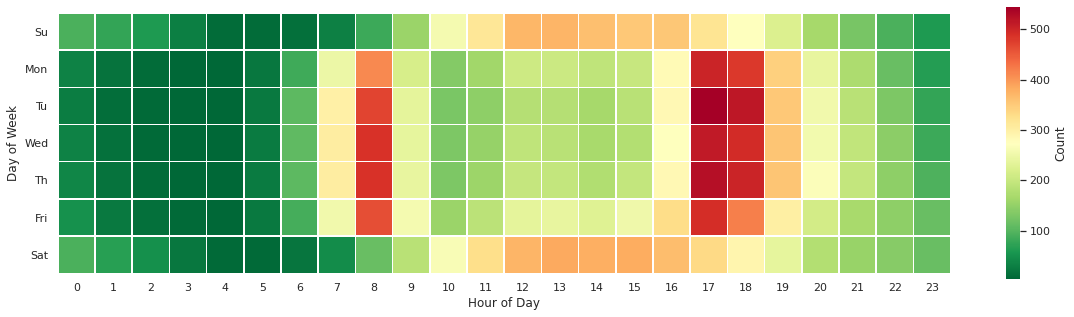

In [9]:
df_2 = df.groupby(['weekday', 'hr']).mean().reset_index()
df_2 = df_2.pivot('weekday', 'hr', 'cnt')
wkdays = ['Su', 'Mon', 'Tu', 'Wed', 'Th', 'Fri', 'Sat']

f, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(df_2, cmap="RdYlGn_r", square=True, linewidths=0.5, cbar_kws={'label': 'Count'})
ax.set_xlabel('Hour of Day');   ax.set_ylabel('Day of Week')
ax.set_yticklabels(wkdays, rotation=0)
plt.show()

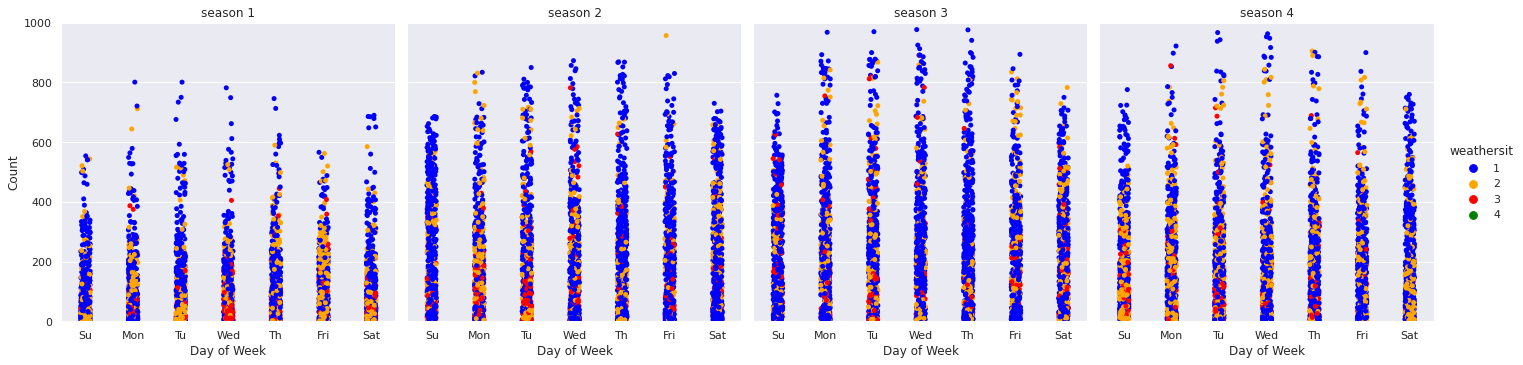

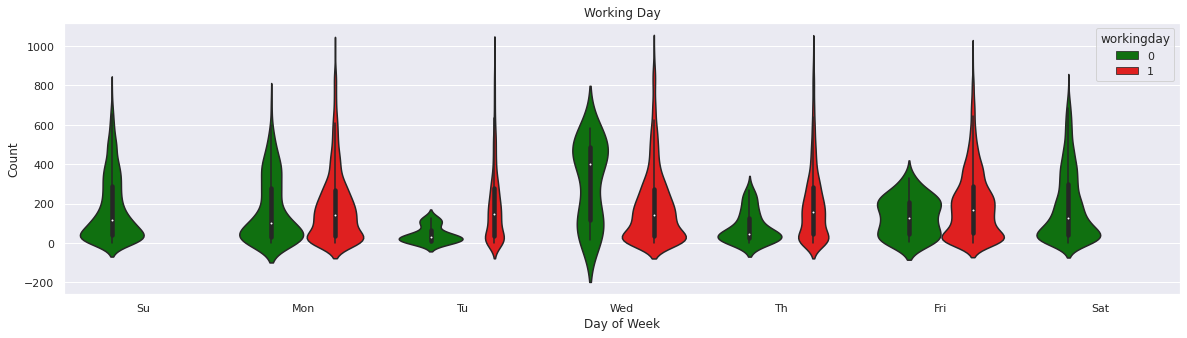

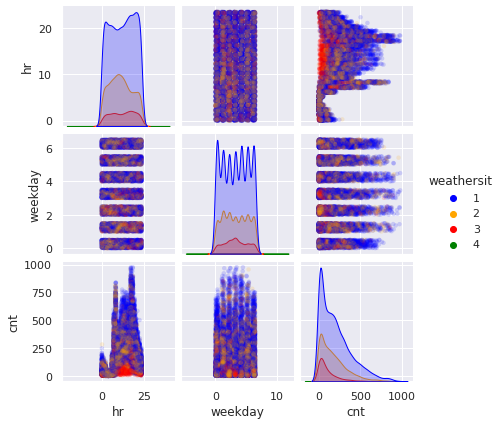

In [10]:
# Visualization 1 : Strip Plot ----------------------------------------------------------------------
wk_cnt = sns.catplot(x='weekday', y='cnt', col='season', hue='weathersit', kind='strip', data=df, palette=['blue','orange','red','green'])
(wk_cnt.set_axis_labels('Day of Week', 'Count')
  .set_titles('{col_var} {col_name}')
  .set_xticklabels(wkdays)
  .set(ylim=(0, 1000))
  .despine(left=True))
 
# Visualization 2 : Violin Plot ----------------------------------------------------------------------
f, cnt_wk = plt.subplots(figsize=(20, 5))
cnt_wk = sns.violinplot(x='weekday', y='cnt', hue='workingday', data=df, palette=['green', 'red'])
cnt_wk.set_xlabel('Day of Week');   cnt_wk.set_ylabel('Count')
cnt_wk.set_xticklabels(wkdays, rotation=0)
cnt_wk.set_title('Working Day')
#plt.show()
 
# Visualization 3 : Jitter Plot ----------------------------------------------------------------------
jitter_values = ['hr','weekday','cnt','weathersit']
df_jitter = df[jitter_values].copy()
df_jitter[['hr', 'weekday', 'cnt']] += np.random.rand(len(df_jitter),3)/2
ax = sns.pairplot(df_jitter, hue="weathersit", height=2, plot_kws=dict(s=20,alpha=0.15,linewidth=0), palette=['blue','orange','red','green'])

--------------------------

## 3. Modeling

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1 Training

-------------


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2 Testing